In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [41]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
inspect(engine).get_table_names()

['measurement', 'station']

In [43]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [44]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
measurement = Base.classes.measurement 

station = Base.classes.station 

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

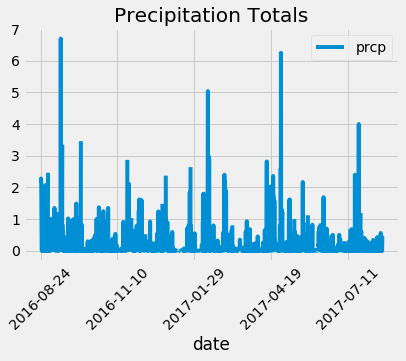

<Figure size 432x288 with 0 Axes>

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latestYear = session.query(func.max(measurement.date)).first()[0]
latestYear = dt.datetime.strptime(latestYear, '%Y-%m-%d')

# Calculate the date 1 year ago from the last data point in the database
priorYear = latestYear - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date > priorYear)

# Save the query results as a Pandas DataFrame and set the index to the date column
prc_df = pd.DataFrame(precipitation)
prc_df = prc_df.set_index('date')

# Sort the dataframe by date
prc_df = prc_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prc_df.plot(rot=45)
plt.title('Precipitation Totals')
plt.show()
plt.savefig('Precipitation_totals.png')


In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prc_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
session.query(station).count()

9

In [57]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
act_stations = session.query(measurement.station, func.count()).group_by('station').order_by(func.count().desc()).all()

most_active = act_stations[0][0]

print(act_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

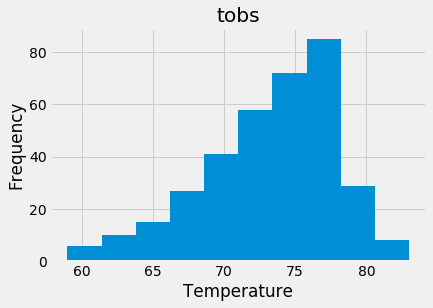

<Figure size 432x288 with 0 Axes>

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp_obs = session.query(measurement.date, measurement.tobs).filter((measurement.station == most_active) & (measurement.date > priorYear)).all()

pd.DataFrame(highest_temp_obs).hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Highest_Oberservations.png')